# Kings County Housing Prices Bakeoff

Below are a list of steps that you should take while trying to complete your bake-off entry.

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
import statsmodels.formula.api as smf
from datetime import datetime

%matplotlib inline


pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

## Step 1: Read in Data

In [2]:
df = pd.read_csv('kc_house_data_train.csv', index_col=0)

In [3]:
df.head()

id             date      price  bedrooms  bathrooms  sqft_living  sqft_lot  floors  waterfront  view  condition  grade  sqft_above  sqft_basement  yr_built  yr_renovated  zipcode      lat     long  sqft_living15  sqft_lot15
0  2591820310  20141006T000000   365000.0         4       2.25         2070      8893     2.0           0     0          4      8        2070              0      1986             0    98058  47.4388 -122.162           2390        7700
1  7974200820  20140821T000000   865000.0         5       3.00         2900      6730     1.0           0     0          5      8        1830           1070      1977             0    98115  47.6784 -122.285           2370        6283
2  7701450110  20140815T000000  1038000.0         4       2.50         3770     10893     2.0           0     2          3     11        3770              0      1997             0    98006  47.5646 -122.129           3710        9685
3  9522300010  20150331T000000  1490000.0         3       3.50         4560     14608     2.0           0     2          3     12        4560              0      1990             0    98034  47.6995 -122.228           4050       14226
4  9510861140  20140714T000000   711000.0         3       2.50         2550      5376     2.0           0     0          3      9        2550              0      2004             0    98052  47.6647 -122.083           2250        4050

In [4]:
df.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade', 'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long', 'sqft_living15', 'sqft_lot15'], dtype='object')

In [5]:
df.shape

(17290, 21)

In [6]:
df.describe()

id         price      bedrooms     bathrooms   sqft_living      sqft_lot        floors    waterfront          view     condition         grade    sqft_above  sqft_basement      yr_built  yr_renovated       zipcode           lat          long  sqft_living15     sqft_lot15
count  1.729000e+04  1.729000e+04  17290.000000  17290.000000  17290.000000  1.729000e+04  17290.000000  17290.000000  17290.000000  17290.000000  17290.000000  17290.000000   17290.000000  17290.000000  17290.000000  17290.000000  17290.000000  17290.000000   17290.000000   17290.000000
mean   4.565502e+09  5.407395e+05      3.372470      2.111943   2081.464604  1.524340e+04      1.490312      0.007981      0.238519      3.408502      7.654425   1789.306015     292.158589   1970.792019     83.806304  98078.193175     47.560058   -122.214258    1987.986698   12873.475824
std    2.874656e+09  3.733190e+05      0.939346      0.770476    920.018539  4.230462e+04      0.538909      0.088985      0.775229      0.651296      1.174718    829.265107     443.151874     29.343516    400.329376     53.607949      0.138412      0.140857     684.802635   27227.437583
min    1.000102e+06  7.500000e+04      0.000000      0.000000    290.000000  5.720000e+02      1.000000      0.000000      0.000000      1.000000      1.000000    290.000000       0.000000   1900.000000      0.000000  98001.000000     47.155900   -122.519000     399.000000     659.000000
25%    2.114701e+09  3.210000e+05      3.000000      1.500000   1430.000000  5.081250e+03      1.000000      0.000000      0.000000      3.000000      7.000000   1200.000000       0.000000   1951.000000      0.000000  98033.000000     47.471200   -122.329000    1490.000000    5111.250000
50%    3.903650e+09  4.500000e+05      3.000000      2.250000   1920.000000  7.642000e+03      1.500000      0.000000      0.000000      3.000000      7.000000   1560.000000       0.000000   1974.000000      0.000000  98065.000000     47.571600   -122.230000    1840.000000    7622.500000
75%    7.301150e+09  6.450000e+05      4.000000      2.500000   2550.000000  1.072575e+04      2.000000      0.000000      0.000000      4.000000      8.000000   2214.500000     560.000000   1996.000000      0.000000  98118.000000     47.677900   -122.126000    2360.000000   10101.750000
max    9.900000e+09  7.700000e+06     33.000000      8.000000  13540.000000  1.651359e+06      3.500000      1.000000      4.000000      5.000000     13.000000   9410.000000    4820.000000   2015.000000   2015.000000  98199.000000     47.777600   -121.315000    6210.000000  858132.000000

In [7]:
df.isna().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

In [8]:
df.head()

id             date      price  bedrooms  bathrooms  sqft_living  sqft_lot  floors  waterfront  view  condition  grade  sqft_above  sqft_basement  yr_built  yr_renovated  zipcode      lat     long  sqft_living15  sqft_lot15
0  2591820310  20141006T000000   365000.0         4       2.25         2070      8893     2.0           0     0          4      8        2070              0      1986             0    98058  47.4388 -122.162           2390        7700
1  7974200820  20140821T000000   865000.0         5       3.00         2900      6730     1.0           0     0          5      8        1830           1070      1977             0    98115  47.6784 -122.285           2370        6283
2  7701450110  20140815T000000  1038000.0         4       2.50         3770     10893     2.0           0     2          3     11        3770              0      1997             0    98006  47.5646 -122.129           3710        9685
3  9522300010  20150331T000000  1490000.0         3       3.50         4560     14608     2.0           0     2          3     12        4560              0      1990             0    98034  47.6995 -122.228           4050       14226
4  9510861140  20140714T000000   711000.0         3       2.50         2550      5376     2.0           0     0          3      9        2550              0      2004             0    98052  47.6647 -122.083           2250        4050

In [9]:
#len('20141006T000000') # 8 
'20141006'[0:4], '20141006'[4:6], '20141006'[6:8]


('2014', '10', '06')

In [10]:
# df.date

In [11]:
#df['yr_sold'] = np.where(df['date'], datetime(df['date'][0:4]), 0)
# df['yr_sold'].value_counts()

In [12]:
# At the first glance, looking at the columns, I find id and date not useful and may influence numbers later. So for our training model, I will create new df without the id


train_df = df.drop(axis=1, columns=['id', 'date', 'floors'])






In [13]:
train_df.head()

price  bedrooms  bathrooms  sqft_living  sqft_lot  waterfront  view  condition  grade  sqft_above  sqft_basement  yr_built  yr_renovated  zipcode      lat     long  sqft_living15  sqft_lot15
0   365000.0         4       2.25         2070      8893           0     0          4      8        2070              0      1986             0    98058  47.4388 -122.162           2390        7700
1   865000.0         5       3.00         2900      6730           0     0          5      8        1830           1070      1977             0    98115  47.6784 -122.285           2370        6283
2  1038000.0         4       2.50         3770     10893           0     2          3     11        3770              0      1997             0    98006  47.5646 -122.129           3710        9685
3  1490000.0         3       3.50         4560     14608           0     2          3     12        4560              0      1990             0    98034  47.6995 -122.228           4050       14226
4   711000.0         3       2.50         2550      5376           0     0          3      9        2550              0      2004             0    98052  47.6647 -122.083           2250        4050

In [14]:
train_df.columns

Index(['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'waterfront', 'view', 'condition', 'grade', 'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long', 'sqft_living15', 'sqft_lot15'], dtype='object')

In [15]:
all_ind_features_list = [val for val in train_df.columns if val != 'price']
all_ind_features_str = '+'.join(all_ind_features_list)
print (all_ind_features_list)

['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'waterfront', 'view', 'condition', 'grade', 'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long', 'sqft_living15', 'sqft_lot15']


## Step 2: Exploratory Data Analysis 
    
Become familiar with the data.  Look to see if there are any extreme values.  

Additionally create data visualizations to determine if there are any relationships between your features and your target variables.  

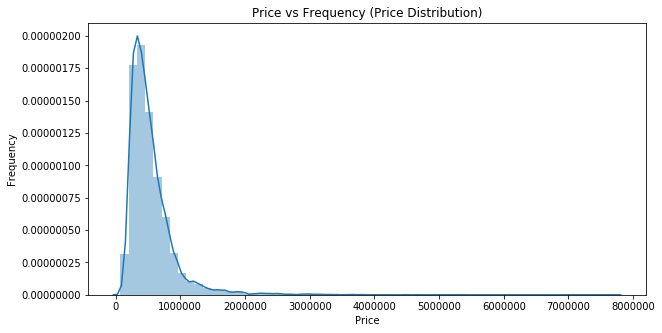

In [16]:
### Target Dependent Variable = Price
# Price vs Count
fig, ax = plt.subplots(figsize = (10,5));
sns.distplot(train_df.price, kde=True, bins=60);
ax.set(xlabel='Price', ylabel='Frequency', title='Price vs Frequency (Price Distribution)');


In [17]:
# Price Distribution is skewed to the right

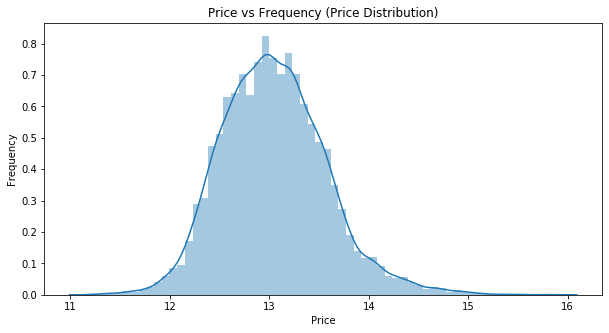

In [18]:
# Log func 
fig, ax = plt.subplots(figsize = (10,5));
sns.distplot(np.log(train_df.price), kde=True, bins=60);
ax.set(xlabel='Price', ylabel='Frequency', title='Price vs Frequency (Price Distribution)');

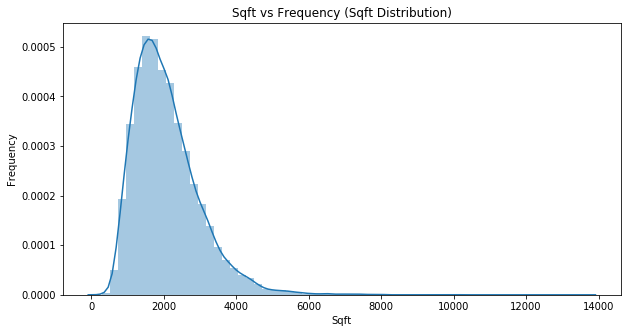

In [19]:
# sqft_living vs price distribution
fig, ax = plt.subplots(figsize = (10,5));
sns.distplot(train_df['sqft_living'], kde=True, bins=60);
ax.set(xlabel='Sqft', ylabel='Frequency', title='Sqft vs Frequency (Sqft Distribution)');

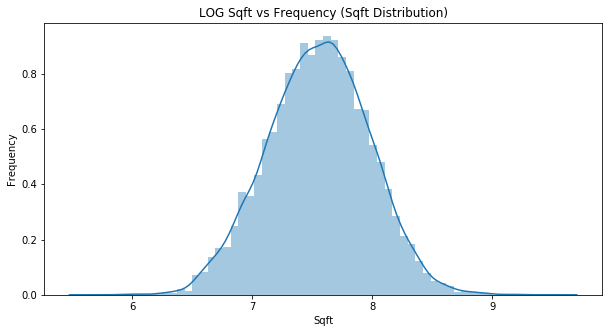

In [20]:
# Log func 
fig, ax = plt.subplots(figsize = (10,5));
sns.distplot(np.log(train_df['sqft_living']), kde=True, bins=60);
ax.set(xlabel='Sqft', ylabel='Frequency', title='LOG Sqft vs Frequency (Sqft Distribution)');

In [21]:
# Add a column that runs np.log on train_df['sqft_living']
train_df['log_sqft_living'] = np.where(train_df['sqft_living'], np.log(train_df['sqft_living']), train_df['sqft_living'])

In [22]:
train_df

price  bedrooms  bathrooms  sqft_living  sqft_lot  waterfront  view  condition  grade  sqft_above  sqft_basement  yr_built  yr_renovated  zipcode      lat     long  sqft_living15  sqft_lot15  log_sqft_living
0       365000.0         4       2.25         2070      8893           0     0          4      8        2070              0      1986             0    98058  47.4388 -122.162           2390        7700         7.635304
1       865000.0         5       3.00         2900      6730           0     0          5      8        1830           1070      1977             0    98115  47.6784 -122.285           2370        6283         7.972466
2      1038000.0         4       2.50         3770     10893           0     2          3     11        3770              0      1997             0    98006  47.5646 -122.129           3710        9685         8.234830
3      1490000.0         3       3.50         4560     14608           0     2          3     12        4560              0      1990             0    98034  47.6995 -122.228           4050       14226         8.425078
4       711000.0         3       2.50         2550      5376           0     0          3      9        2550              0      2004             0    98052  47.6647 -122.083           2250        4050         7.843849
...          ...       ...        ...          ...       ...         ...   ...        ...    ...         ...            ...       ...           ...      ...      ...      ...            ...         ...              ...
17285   750000.0         5       2.50         3240      9960           0     1          3      8        2020           1220      1958             0    98008  47.5858 -122.112           2730       10400         8.083329
17286   440000.0         2       1.75         1300      4000           0     0          3      7        1300              0      1948             0    98105  47.6687 -122.288           1350        4013         7.170120
17287   310000.0         3       1.00         1050      9876           0     0          3      7        1050              0      1953             0    98028  47.7635 -122.262           1760        9403         6.956545
17288   427500.0         3       1.50         1900     43186           0     0          4      7        1300            600      1971             0    98038  47.4199 -121.990           2080      108028         7.549609
17289   348000.0         3       1.50         1330      6768           0     0          4      7        1330              0      1952             0    98155  47.7366 -122.319           1320        6910         7.192934

[17290 rows x 19 columns]

In [23]:
all_ind_features_list = [val for val in train_df.columns if val != 'price']
all_ind_features_str = '+'.join(all_ind_features_list)
print (all_ind_features_list)

['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'waterfront', 'view', 'condition', 'grade', 'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long', 'sqft_living15', 'sqft_lot15', 'log_sqft_living']


In [24]:
mlr_model = smf.ols(formula=f'price~{all_ind_features_str}', data=train_df).fit()
mlr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.726
Model:                            OLS   Adj. R-squared:                  0.726
Method:                 Least Squares   F-statistic:                     2698.
Date:                Tue, 08 Sep 2020   Prob (F-statistic):               0.00
Time:                        00:49:00   Log-Likelihood:            -2.3516e+05
No. Observations:               17290   AIC:                         4.704e+05
Df Residuals:                   17272   BIC:                         4.705e+05
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept        1.076e+07   3.13e+06      3.443      0.001    4.63e+06    1.69e+07
bedrooms        -1.214e+04   2093.738     -5.800      0.000   -1.62e+04   -8039.224
bathrooms        5.629e+04   3423.564     16.441      0.000    4.96e+04     6.3e+04
sqft_living       246.2246      3.967     62.068      0.000     238.449     254.000
sqft_lot            0.0584      0.050      1.175      0.240      -0.039       0.156
waterfront         5.8e+05   1.84e+04     31.547      0.000    5.44e+05    6.16e+05
view             4.769e+04   2302.566     20.713      0.000    4.32e+04    5.22e+04
condition        3.346e+04   2543.886     13.151      0.000    2.85e+04    3.84e+04
grade            1.031e+05   2338.543     44.099      0.000    9.85e+04    1.08e+05
sqft_above        131.5541      2.643     49.765      0.000     126.373     136.736
sqft_basement     114.6720      3.158     36.310      0.000     108.482     120.862
yr_built        -2299.7560     77.250    -29.770      0.000   -2451.174   -2148.338
yr_renovated       26.0730      3.974      6.560      0.000      18.283      33.863
zipcode          -573.6613     35.557    -16.134      0.000    -643.357    -503.966
lat              5.967e+05   1.16e+04     51.389      0.000    5.74e+05    6.19e+05
long            -1.993e+05   1.41e+04    -14.094      0.000   -2.27e+05   -1.72e+05
sqft_living15      33.7082      3.728      9.042      0.000      26.401      41.015
sqft_lot15         -0.3160      0.078     -4.056      0.000      -0.469      -0.163
log_sqft_living -5.302e+05   1.25e+04    -42.282      0.000   -5.55e+05   -5.06e+05
==============================================================================
Omnibus:                    11070.975   Durbin-Watson:                   2.008
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           612232.334
Skew:                           2.404   Prob(JB):                         0.00
Kurtosis:                      31.753   Cond. No.                     3.95e+17
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 1.13e-21. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [25]:
### Pairplot

# sns.pairplot(df)

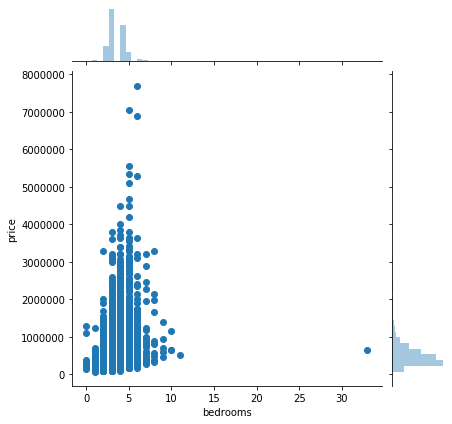

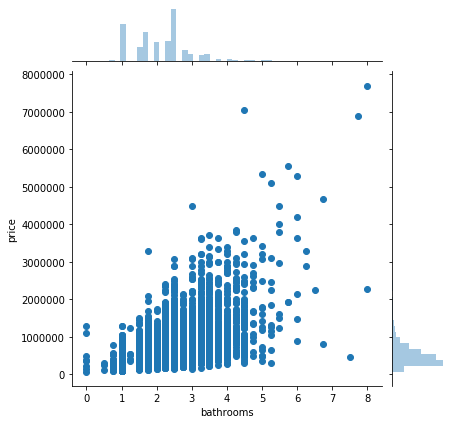

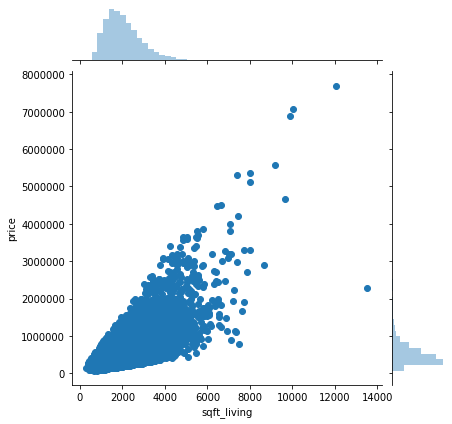

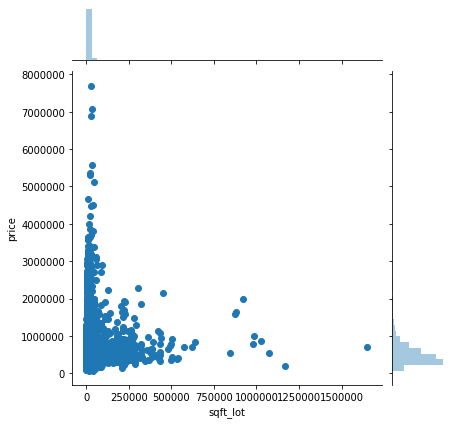

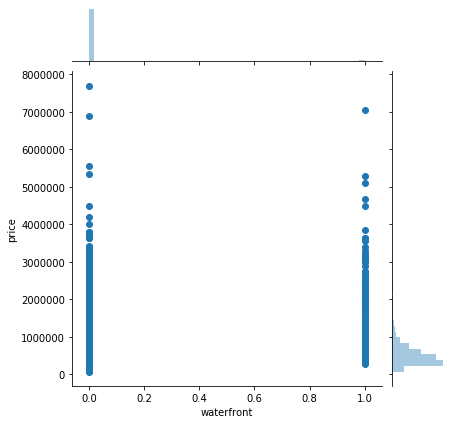

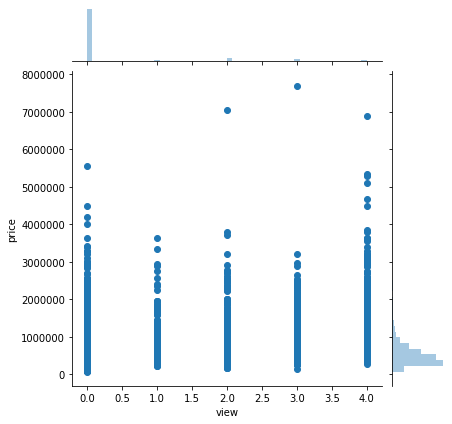

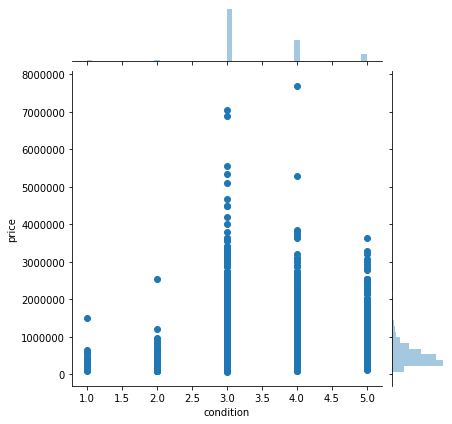

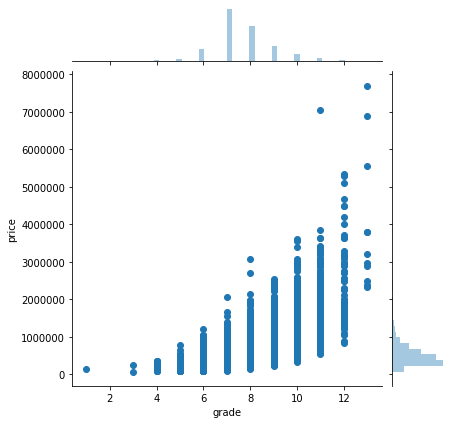

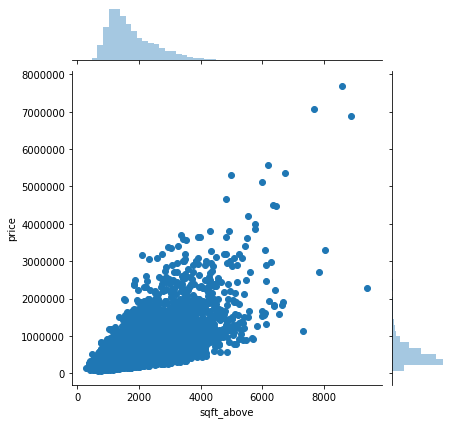

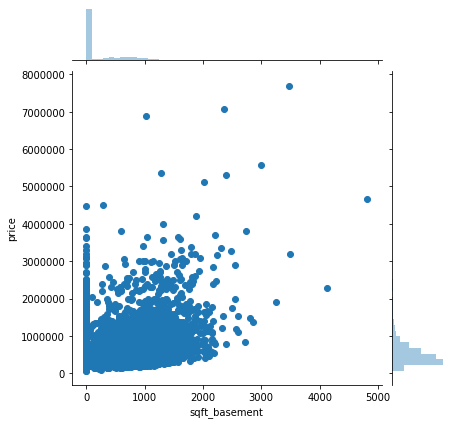

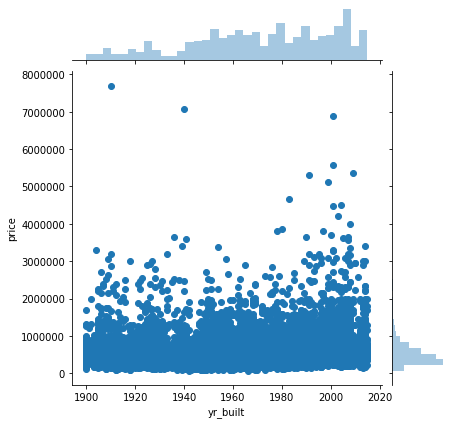

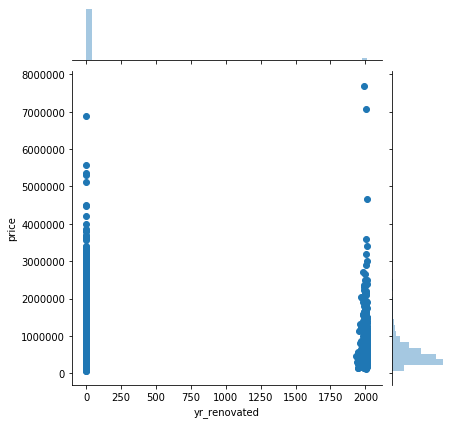

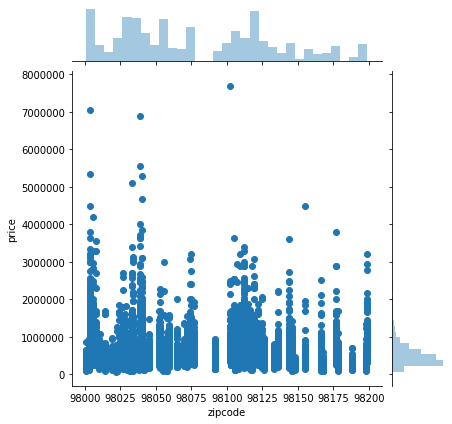

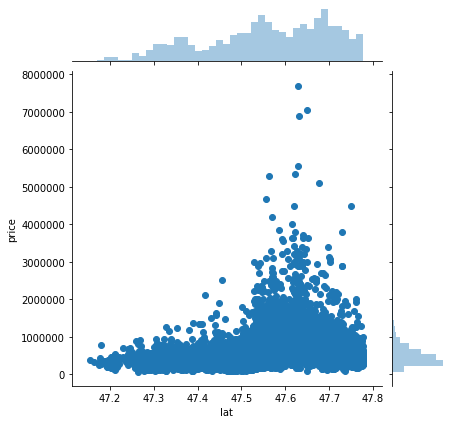

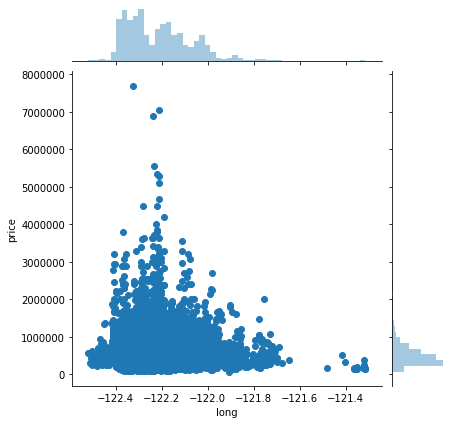

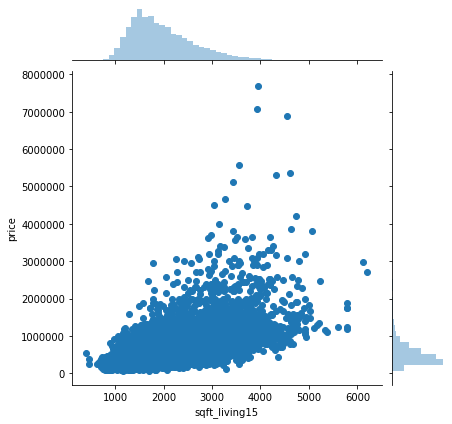

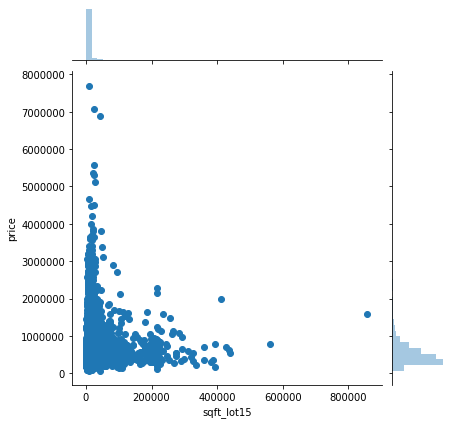

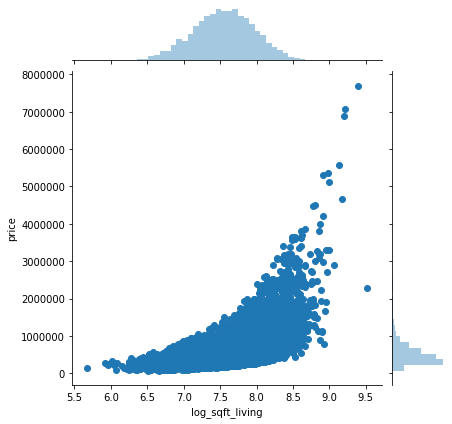

In [26]:
# Graph all graphs for each independent column

for column in all_ind_features_list:
    sns.jointplot(x=column, y='price', data=train_df, kind='scatter');


Looking at the charts, only really clear relationship is shown with column 'sqft_living'

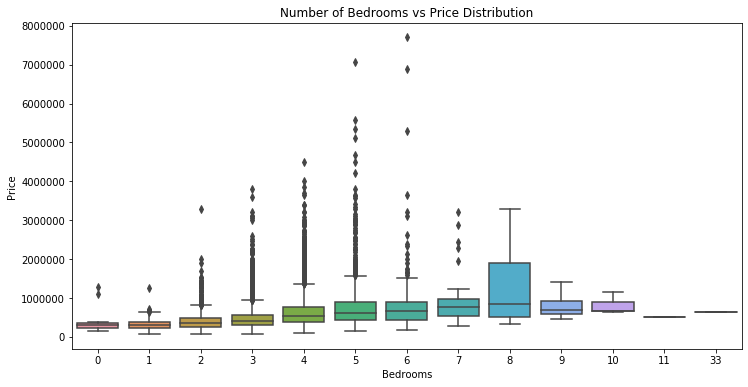

In [27]:
# Bedroom vs Price Distirbution

fig, ax = plt.subplots(figsize=(12, 6))
sns.boxplot(x='bedrooms', y="price", data=train_df)
ax.set(xlabel='Bedrooms', ylabel='Price',title='Number of Bedrooms vs Price Distribution');
# Looking at the boxplot, we know that there is one outlier of 33 rooms that costs very cheap (probably need to drop)
# We also know houses should have more than one bedroom (or is that studio?)

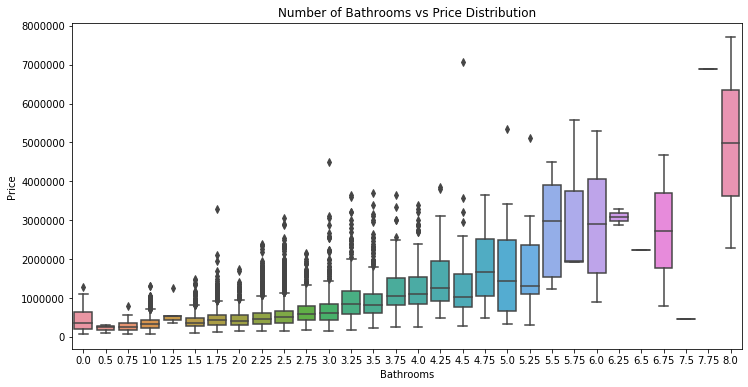

In [28]:
# Bathroom vs Price Distribution

fig, ax = plt.subplots(figsize=(12, 6))
sns.boxplot(x='bathrooms', y="price", data=train_df)
ax.set(xlabel='Bathrooms', ylabel='Price',title='Number of Bathrooms vs Price Distribution');

# Looking at this graph, we can see that there are houses with 0 bathrooms

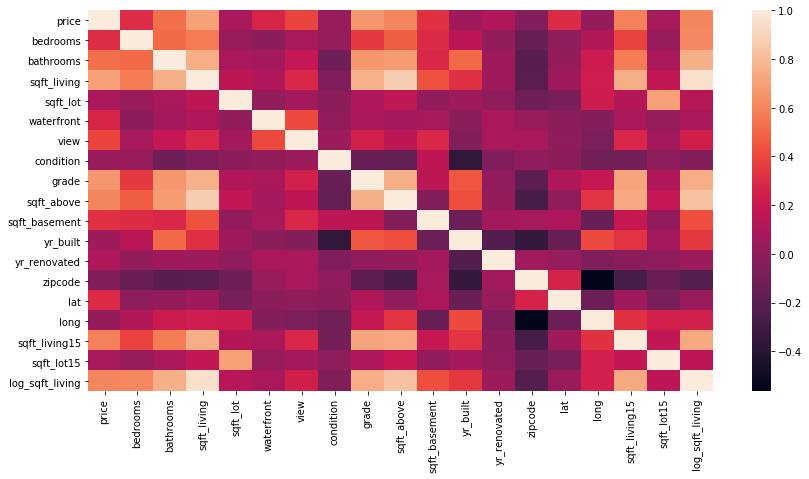

In [29]:
# Correlation Matrix
fig, ax = plt.subplots(figsize=(14, 7))
sns.heatmap(train_df.corr());

## Step 3: Clean up any issues with the data like extreme values.  

remember that you can't just delete rows with extreme values. Similar observations might be present in the holdout dataset, and you can't just delete those rows and not have a prediction for it. 

In [30]:
# Let's look at the row with 33 bedrooms and row with 7.5 bedroom from graph
train_df[train_df['bedrooms'] == 33]

price  bedrooms  bathrooms  sqft_living  sqft_lot  waterfront  view  condition  grade  sqft_above  sqft_basement  yr_built  yr_renovated  zipcode      lat     long  sqft_living15  sqft_lot15  log_sqft_living
8597  640000.0        33       1.75         1620      6000           0     0          5      7        1040            580      1947             0    98103  47.6878 -122.331           1330        4700         7.390181

In [31]:
# How to go at data cleaning:
## Should we drop these outliers?
## Is there such things as 0 bedrooms? Would that count as studio?

In [32]:
# Drop 33 bedrooms outlier
train_df.drop(train_df.loc[train_df['bedrooms'] == 33].index, axis = 0, inplace=True)


In [33]:
# Drop 8 observations with 0 bathrooms because we expect houses to have a bathroom...
# train_df.drop(train_df.loc[train_df['bathrooms'] == 0].index, axis=0, inplace=True)

In [34]:
# df[df['bathrooms'] == 0]

In [35]:
df.waterfront.value_counts()

0    17152
1      138
Name: waterfront, dtype: int64

In [36]:
# yr_renovated col has alot of 0 as their value. 
train_df['yr_renovated'].value_counts()

0       16563
2014       71
2007       32
2005       32
2000       31
2013       30
2003       28
2006       21
1990       21
1989       21
2004       19
2002       19
1987       16
1999       16
1995       16
1998       15
2010       15
1991       15
1985       15
2009       15
1986       14
1996       14
1993       14
2001       13
1994       13
2008       13
1984       12
1988       12
2015       12
1983       11
1997       10
2012        9
1992        9
2011        8
1980        7
1982        7
1970        7
1979        7
1968        6
1977        6
1975        5
1978        5
1964        4
1973        4
1965        4
1955        3
1953        3
1981        3
1972        3
1976        3
1958        3
1945        3
1960        3
1963        3
1957        2
1962        2
1967        2
1969        2
1950        2
1971        2
1974        2
1940        2
1956        2
1946        2
1934        1
1959        1
1944        1
1951        1
1948        1
Name: yr_renovated, dtype: int64

In [37]:
train_df.waterfront.value_counts()

0    17151
1      138
Name: waterfront, dtype: int64

In [38]:
train_df.head()

price  bedrooms  bathrooms  sqft_living  sqft_lot  waterfront  view  condition  grade  sqft_above  sqft_basement  yr_built  yr_renovated  zipcode      lat     long  sqft_living15  sqft_lot15  log_sqft_living
0   365000.0         4       2.25         2070      8893           0     0          4      8        2070              0      1986             0    98058  47.4388 -122.162           2390        7700         7.635304
1   865000.0         5       3.00         2900      6730           0     0          5      8        1830           1070      1977             0    98115  47.6784 -122.285           2370        6283         7.972466
2  1038000.0         4       2.50         3770     10893           0     2          3     11        3770              0      1997             0    98006  47.5646 -122.129           3710        9685         8.234830
3  1490000.0         3       3.50         4560     14608           0     2          3     12        4560              0      1990             0    98034  47.6995 -122.228           4050       14226         8.425078
4   711000.0         3       2.50         2550      5376           0     0          3      9        2550              0      2004             0    98052  47.6647 -122.083           2250        4050         7.843849

In [39]:
# Create is_renovated column: if house is equal to or older than 2000, then it is renovated.
conditions = [
    train_df['yr_renovated'] < 2000,
    train_df['yr_renovated'] >= 2000
]
choices = [
    0,
    1
]
train_df['is_renovated']=np.select(conditions, choices, train_df['yr_renovated'])
train_df['is_renovated'].value_counts()

0    16921
1      368
Name: is_renovated, dtype: int64

In [40]:
datetime.now().year

2020

In [41]:
# Create yr_old column using yr_built
train_df['yr_old'] = np.where(train_df['yr_built'], datetime.now().year - train_df['yr_built'], train_df['yr_built'])
# train_df['yr_old'].value_counts()

In [42]:
df.view.value_counts()

0    15571
2      775
3      410
4      270
1      264
Name: view, dtype: int64

In [43]:
# Create is_viewed column where if the house had been viewed 1 time or more, it is true(1)
train_df['view'].value_counts()
train_df['is_viewed'] = np.where(train_df['view'] > 0, 1, 0)
train_df['is_viewed'].value_counts()

0    15570
1     1719
Name: is_viewed, dtype: int64

In [44]:
train_df.head()

price  bedrooms  bathrooms  sqft_living  sqft_lot  waterfront  view  condition  grade  sqft_above  sqft_basement  yr_built  yr_renovated  zipcode      lat     long  sqft_living15  sqft_lot15  log_sqft_living  is_renovated  yr_old  is_viewed
0   365000.0         4       2.25         2070      8893           0     0          4      8        2070              0      1986             0    98058  47.4388 -122.162           2390        7700         7.635304             0      34          0
1   865000.0         5       3.00         2900      6730           0     0          5      8        1830           1070      1977             0    98115  47.6784 -122.285           2370        6283         7.972466             0      43          0
2  1038000.0         4       2.50         3770     10893           0     2          3     11        3770              0      1997             0    98006  47.5646 -122.129           3710        9685         8.234830             0      23          1
3  1490000.0         3       3.50         4560     14608           0     2          3     12        4560              0      1990             0    98034  47.6995 -122.228           4050       14226         8.425078             0      30          1
4   711000.0         3       2.50         2550      5376           0     0          3      9        2550              0      2004             0    98052  47.6647 -122.083           2250        4050         7.843849             0      16          0

## Step 4: Generate new features that you think could be important

After doing this, you will want to go back to steps 2 and 3 to investigates these new features

### 4.1) Identify a categorical variable in the data set and create dummy columns.

In [45]:
# zipcode is a categorical variable -> so I want to use pd.get_dummies() dummy variables
train_df = pd.concat([train_df, pd.get_dummies(train_df['zipcode'], drop_first=True)], axis=1)
train_df.drop('zipcode', axis=1, inplace=True)
train_df.head()

price  bedrooms  bathrooms  sqft_living  sqft_lot  waterfront  view  condition  grade  sqft_above  sqft_basement  yr_built  yr_renovated      lat     long  sqft_living15  sqft_lot15  log_sqft_living  is_renovated  yr_old  is_viewed  98002  98003  98004  98005  98006  98007  98008  98010  98011  98014  98019  98022  98023  98024  98027  98028  98029  98030  98031  98032  98033  98034  98038  98039  98040  98042  98045  98052  98053  98055  98056  98058  98059  98065  98070  98072  98074  98075  98077  98092  98102  98103  98105  98106  98107  98108  98109  98112  98115  98116  98117  98118  98119  98122  98125  98126  98133  98136  98144  98146  98148  98155  98166  98168  98177  98178  98188  98198  98199
0   365000.0         4       2.25         2070      8893           0     0          4      8        2070              0      1986             0  47.4388 -122.162           2390        7700         7.635304             0      34          0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      1      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0
1   865000.0         5       3.00         2900      6730           0     0          5      8        1830           1070      1977             0  47.6784 -122.285           2370        6283         7.972466             0      43          0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      1      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0
2  1038000.0         4       2.50         3770     10893           0     2          3     11        3770              0      1997             0  47.5646 -122.129           3710        9685         8.234830             0      23          1      0      0      0      0      1      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0
3  1490000.0         3       3.50         4560     14608           0     2          3     12        4560              0      1990             0  47.6995 -122.228           4050       14226         8.425078             0      30          1      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      1      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0
4   711000.0         3       2.50         2550      5376           0     0          3      9        2550              0      2004             0  47.6647 -122.083           2250        4050         7.843849             0      16          0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0     

In [46]:
train_df.condition.value_counts()

3    11244
4     4516
5     1366
2      139
1       24
Name: condition, dtype: int64

In [47]:
train_df.grade.value_counts()

7     7182
8     4848
9     2099
6     1648
10     893
11     319
5      192
12      72
4       22
13      11
3        2
1        1
Name: grade, dtype: int64

In [48]:
# could be multicollinearity
train_df.yr_renovated.value_counts()

0       16563
2014       71
2007       32
2005       32
2000       31
2013       30
2003       28
2006       21
1990       21
1989       21
2004       19
2002       19
1987       16
1999       16
1995       16
1998       15
2010       15
1991       15
1985       15
2009       15
1986       14
1996       14
1993       14
2001       13
1994       13
2008       13
1984       12
1988       12
2015       12
1983       11
1997       10
2012        9
1992        9
2011        8
1980        7
1982        7
1970        7
1979        7
1968        6
1977        6
1975        5
1978        5
1964        4
1973        4
1965        4
1955        3
1953        3
1981        3
1972        3
1976        3
1958        3
1945        3
1960        3
1963        3
1957        2
1962        2
1967        2
1969        2
1950        2
1971        2
1974        2
1940        2
1956        2
1946        2
1934        1
1959        1
1944        1
1951        1
1948        1
Name: yr_renovated, dtype: int64

In [49]:
train_df.is_renovated.value_counts()

0    16921
1      368
Name: is_renovated, dtype: int64

### 4.2) There is a column that gives the date for when the house was sold, how could this be useful in your model? How might you transform the current column to a more useful feature?

In [50]:
# Date could be useful in the sense that I can see by seasons to see when the houses are sold more or could use it by year

# Later: convert date to yr_sold(yearly), mon_sold(maybe season)

### 4.3) There are columns for when the house was built and when it was renovated.  How could you use these columns to create a new column

In [51]:
# looking at yr_built and yr_renovated, I created yr_old using yr_built and is_renovated using yr_renovated


### Non-linear transformations

### 4.4) Create a polynomial feature for two of your continuous variables


In [52]:
train_df[train_df.columns[1:]]

bedrooms  bathrooms  sqft_living  sqft_lot  waterfront  view  condition  grade  sqft_above  sqft_basement  yr_built  yr_renovated      lat     long  sqft_living15  sqft_lot15  log_sqft_living  is_renovated  yr_old  is_viewed  98002  98003  98004  98005  98006  98007  98008  98010  98011  98014  98019  98022  98023  98024  98027  98028  98029  98030  98031  98032  98033  98034  98038  98039  98040  98042  98045  98052  98053  98055  98056  98058  98059  98065  98070  98072  98074  98075  98077  98092  98102  98103  98105  98106  98107  98108  98109  98112  98115  98116  98117  98118  98119  98122  98125  98126  98133  98136  98144  98146  98148  98155  98166  98168  98177  98178  98188  98198  98199
0             4       2.25         2070      8893           0     0          4      8        2070              0      1986             0  47.4388 -122.162           2390        7700         7.635304             0      34          0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      1      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0
1             5       3.00         2900      6730           0     0          5      8        1830           1070      1977             0  47.6784 -122.285           2370        6283         7.972466             0      43          0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      1      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0
2             4       2.50         3770     10893           0     2          3     11        3770              0      1997             0  47.5646 -122.129           3710        9685         8.234830             0      23          1      0      0      0      0      1      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0
3             3       3.50         4560     14608           0     2          3     12        4560              0      1990             0  47.6995 -122.228           4050       14226         8.425078             0      30          1      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      1      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0
4             3       2.50         2550      5376           0     0          3      9        2550              0      2004             0  47.6647 -122.083           2250        4050         7.843849             0      16          0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      1     

In [53]:
# Linear Regression Model:
from sklearn.linear_model import LinearRegression
#instantiate a linear regression object
lm = LinearRegression()

#fit the linear regression to the data
lm = lm.fit(train_df[train_df.columns[1:]], train_df['price'])
#access output
print('intercept:', lm.intercept_)
print('multiple coefficients', lm.coef_)
print("R^2: ", lm.score(train_df[train_df.columns[1:]], train_df['price']))

intercept: -618487282659502.2
multiple coefficients [-8.79996142e+03  2.83720249e+04  1.65090490e+13  1.89895698e-01
  6.27394105e+05  7.05993658e+04  3.34743993e+04  6.23739318e+04
 -1.65090490e+13 -1.65090490e+13  3.06181806e+11 -4.05517578e-01
  2.70701832e+05 -1.88662437e+05  2.28447266e+01 -3.51562500e-02
 -4.46358261e+05  8.26204274e+04  3.06181807e+11 -5.31918784e+04
  2.26082895e+04 -2.67356795e+04  6.95651264e+05  2.24808532e+05
  1.95967199e+05  1.82896618e+05  1.94775128e+05  1.02127739e+05
  2.14035644e+04  6.88896020e+04  3.07715776e+04  6.59061365e+04
 -5.29107434e+04  1.39814386e+05  1.36412668e+05  8.03180838e+03
  1.80797528e+05  5.13898981e+03  1.80222931e+03 -2.43393640e+04
  2.63038049e+05  1.01228859e+05  6.00994128e+04  1.17856247e+06
  4.11338552e+05  1.77222412e+04  1.42703782e+05  1.54321374e+05
  1.36394558e+05  1.03245972e+04  4.59504657e+04  1.53367827e+04
  5.21851333e+04  9.90594276e+04 -6.86276715e+04  5.85121446e+04
  1.24501114e+05  1.26750811e+05  1.54

In [54]:
train_df.columns[1:]

Index(['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'waterfront', 'view', 'condition', 'grade', 'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'lat', 'long', 'sqft_living15', 'sqft_lot15', 'log_sqft_living', 'is_renovated', 'yr_old', 'is_viewed', 98002, 98003, 98004, 98005, 98006, 98007, 98008, 98010, 98011, 98014, 98019, 98022, 98023, 98024, 98027, 98028, 98029, 98030, 98031, 98032, 98033, 98034, 98038, 98039, 98040, 98042, 98045, 98052, 98053, 98055, 98056, 98058, 98059, 98065, 98070, 98072, 98074, 98075, 98077, 98092, 98102, 98103, 98105, 98106, 98107, 98108, 98109, 98112, 98115, 98116, 98117, 98118, 98119, 98122, 98125, 98126, 98133, 98136, 98144, 98146, 98148, 98155, 98166, 98168, 98177, 98178, 98188, 98198, 98199], dtype='object')

In [55]:
# Convert zipcode columns into str because poly func does not take int as col

train_df.columns = train_df.columns.map(lambda x: 'zip_' + str(x) if type(x) != str else x)

In [56]:
from sklearn.preprocessing import PolynomialFeatures
df_features = train_df[train_df.columns[1:]]
poly = PolynomialFeatures(degree=2, include_bias=False)
poly_data = poly.fit_transform(df_features)
print(poly_data)
print(df_features.columns)
poly_columns = poly.get_feature_names(df_features.columns)

[[4.00e+00 2.25e+00 2.07e+03 ... 0.00e+00 0.00e+00 0.00e+00]
 [5.00e+00 3.00e+00 2.90e+03 ... 0.00e+00 0.00e+00 0.00e+00]
 [4.00e+00 2.50e+00 3.77e+03 ... 0.00e+00 0.00e+00 0.00e+00]
 ...
 [3.00e+00 1.00e+00 1.05e+03 ... 0.00e+00 0.00e+00 0.00e+00]
 [3.00e+00 1.50e+00 1.90e+03 ... 0.00e+00 0.00e+00 0.00e+00]
 [3.00e+00 1.50e+00 1.33e+03 ... 0.00e+00 0.00e+00 0.00e+00]]
Index(['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'waterfront', 'view', 'condition', 'grade', 'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'lat', 'long', 'sqft_living15', 'sqft_lot15', 'log_sqft_living', 'is_renovated', 'yr_old', 'is_viewed', 'zip_98002', 'zip_98003', 'zip_98004', 'zip_98005', 'zip_98006', 'zip_98007', 'zip_98008', 'zip_98010', 'zip_98011', 'zip_98014', 'zip_98019', 'zip_98022', 'zip_98023', 'zip_98024', 'zip_98027', 'zip_98028', 'zip_98029', 'zip_98030', 'zip_98031', 'zip_98032', 'zip_98033', 'zip_98034', 'zip_98038', 'zip_98039', 'zip_98040', 'zip_98042', 'zip_98045', 'zip_98052'

In [57]:
df_poly = pd.DataFrame(poly_data, columns=poly_columns)

In [58]:
df_poly

bedrooms  bathrooms  sqft_living  sqft_lot  waterfront  view  condition  grade  sqft_above  sqft_basement  yr_built  yr_renovated      lat     long  sqft_living15  sqft_lot15  log_sqft_living  is_renovated  yr_old  is_viewed  zip_98002  zip_98003  zip_98004  zip_98005  zip_98006  zip_98007  zip_98008  zip_98010  zip_98011  zip_98014  zip_98019  zip_98022  zip_98023  zip_98024  zip_98027  zip_98028  zip_98029  zip_98030  zip_98031  zip_98032  zip_98033  zip_98034  zip_98038  zip_98039  zip_98040  zip_98042  zip_98045  zip_98052  zip_98053  zip_98055  zip_98056  zip_98058  zip_98059  zip_98065  zip_98070  zip_98072  zip_98074  zip_98075  zip_98077  zip_98092  zip_98102  zip_98103  zip_98105  zip_98106  zip_98107  zip_98108  zip_98109  zip_98112  zip_98115  zip_98116  zip_98117  zip_98118  zip_98119  zip_98122  zip_98125  zip_98126  zip_98133  zip_98136  zip_98144  zip_98146  zip_98148  zip_98155  zip_98166  zip_98168  zip_98177  zip_98178  zip_98188  zip_98198  zip_98199  \
0           4.0       2.25       2070.0    8893.0         0.0   0.0        4.0    8.0      2070.0            0.0    1986.0           0.0  47.4388 -122.162         2390.0      7700.0         7.635304           0.0    34.0        0.0        0.0        0.0        0.0        0.0        0.0        0.0        0.0        0.0        0.0        0.0        0.0        0.0        0.0        0.0        0.0        0.0        0.0        0.0        0.0        0.0        0.0        0.0        0.0        0.0        0.0        0.0        0.0        0.0        0.0        0.0        0.0        1.0        0.0        0.0        0.0        0.0        0.0        0.0        0.0        0.0        0.0        0.0        0.0        0.0        0.0        0.0        0.0        0.0        0.0        0.0        0.0        0.0        0.0        0.0        0.0        0.0        0.0        0.0        0.0        0.0        0.0        0.0        0.0        0.0        0.0        0.0        0.0        0.0        0.0   
1           5.0       3.00       2900.0    6730.0         0.0   0.0        5.0    8.0      1830.0         1070.0    1977.0           0.0  47.6784 -122.285         2370.0      6283.0         7.972466           0.0    43.0        0.0        0.0        0.0        0.0        0.0        0.0        0.0        0.0        0.0        0.0        0.0        0.0        0.0        0.0        0.0        0.0        0.0        0.0        0.0        0.0        0.0        0.0        0.0        0.0        0.0        0.0        0.0        0.0        0.0        0.0        0.0        0.0        0.0        0.0        0.0        0.0        0.0        0.0        0.0        0.0        0.0        0.0        0.0        0.0        0.0        0.0        0.0        0.0        0.0        1.0        0.0        0.0        0.0        0.0        0.0        0.0        0.0        0.0        0.0        0.0        0.0        0.0        0.0        0.0        0.0        0.0        0.0        0.0        0.0        0.0   
2           4.0       2.50       3770.0   10893.0         0.0   2.0        3.0   11.0      3770.0            0.0    1997.0           0.0  47.5646 -122.129         3710.0      9685.0         8.234830           0.0    23.0        1.0        0.0        0.0        0.0        0.0        1.0        0.0        0.0        0.0        0.0        0.0        0.0        0.0        0.0        0.0        0.0        0.0        0.0        0.0        0.0        0.0        0.0        0.0        0.0        0.0        0.0        0.0        0.0        0.0        0.0        0.0        0.0        0.0        0.0        0.0        0.0        0.0        0.0        0.0        0.0        0.0        0.0        0.0        0.0        0.0        0.0        0.0        0.0        0.0        0.0        0.0        0.0        0.0        0.0        0.0        0.0        0.0        0.0        0.0        0.0        0.0        0.0        0.0        0.0        0.0        0.0        0.0        0.0        0.0        0.0   
3           3.0       3.50     

In [59]:
# Linear Regression Model with poly:
from sklearn.linear_model import LinearRegression
#instantiate a linear regression object
lm_poly = LinearRegression()

#fit the linear regression to the data
lm_poly = lm_poly.fit(df_poly, train_df['price'])
#access output
print('intercept:', lm_poly.intercept_)
print('multiple coefficients', lm_poly.coef_)
print("R^2: ", lm_poly.score(df_poly, train_df['price']))

intercept: 9355257785.611542
multiple coefficients [ -8712.27773041 -21866.64862524 -14058.1845857  ...    -49.81375671
      0.            -82.91356216]
R^2:  0.935369406616638


### 4.5) Create an interaction feature between a binary variable (dummy variable) and a continuous variable) 

## Step 5: Train Test Split

If you plan on doing any sclaing of your data, make sure it is doen at the apporpriate time. 

### 5.1) Perform a train test split of the data.

In [60]:
from sklearn.model_selection import train_test_split

X_poly_train, X_poly_test, y_poly_train, y_poly_test = train_test_split(df_poly, train_df['price'], random_state=42, test_size = 0.2)
print("Training set - Features: ", X_poly_train.shape, "Target: ", y_poly_train.shape)
print("Test set - Features: ", X_poly_test.shape, "Target: ",y_poly_test.shape)


from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

# fit the scaler to the training data
scaler.fit(X_poly_train) ## Learned the mean and std  -> standarize our values

scaler.fit(X_poly_test)


#transform the training data
X_poly_train = pd.DataFrame(data=scaler.transform(X_poly_train), columns=df_poly.columns)

#transform the testing data
X_poly_test = pd.DataFrame(data=scaler.transform(X_poly_test), columns=df_poly.columns)
print(X_poly_train.shape, X_poly_test.shape)



lm_poly_2 = LinearRegression()

#fit the linear regression to the data
lm_poly_2 = lm_poly_2.fit(X_poly_train, y_poly_train)
lm_poly_2



y_poly_train_pred = lm_poly_2.predict(X_poly_train)
y_poly_test_pred = lm_poly_2.predict(X_poly_test)
y_poly_train_pred


#instantiate a linear regression object
from sklearn import metrics

train_poly_rmse = np.sqrt(metrics.mean_squared_error(y_poly_train, y_poly_train_pred))
test_poly_rmse = np.sqrt(metrics.mean_squared_error(y_poly_test, y_poly_test_pred))

print('Training Root Mean Squared Error:' , train_poly_rmse)
print('Test Root mean Sqaured Erro:', test_poly_rmse)


### R SQUARED
print('R-SQUARED:', lm_poly_2.score(X_poly_train, y_poly_train), lm_poly_2.score(X_poly_test, y_poly_test))



Training set - Features:  (13831, 4094) Target:  (13831,)
Test set - Features:  (3458, 4094) Target:  (3458,)
(13831, 4094) (3458, 4094)
Training Root Mean Squared Error: 91977.7849860913
Test Root mean Sqaured Erro: 361983866723096.1
R-SQUARED: 0.9394288579177403 -9.48538315885005e+17


### 5.2) Fit your scaler to training the data.

### 5.3) Transform the testing set with the scaler.

### 5.4) Fit the model to the training data.

### 5.5) Use the model to predict on the training set and the test set.

### 5.6) Evaluate the training and test predictions using RMSE.

### 5.7) Determine if your model is overfit.

In [61]:
# Normal linear regression!

In [62]:
ind_train_df = train_df[train_df.columns[1:]]
ind_train_df

bedrooms  bathrooms  sqft_living  sqft_lot  waterfront  view  condition  grade  sqft_above  sqft_basement  yr_built  yr_renovated      lat     long  sqft_living15  sqft_lot15  log_sqft_living  is_renovated  yr_old  is_viewed  zip_98002  zip_98003  zip_98004  zip_98005  zip_98006  zip_98007  zip_98008  zip_98010  zip_98011  zip_98014  zip_98019  zip_98022  zip_98023  zip_98024  zip_98027  zip_98028  zip_98029  zip_98030  zip_98031  zip_98032  zip_98033  zip_98034  zip_98038  zip_98039  zip_98040  zip_98042  zip_98045  zip_98052  zip_98053  zip_98055  zip_98056  zip_98058  zip_98059  zip_98065  zip_98070  zip_98072  zip_98074  zip_98075  zip_98077  zip_98092  zip_98102  zip_98103  zip_98105  zip_98106  zip_98107  zip_98108  zip_98109  zip_98112  zip_98115  zip_98116  zip_98117  zip_98118  zip_98119  zip_98122  zip_98125  zip_98126  zip_98133  zip_98136  zip_98144  zip_98146  zip_98148  zip_98155  zip_98166  zip_98168  zip_98177  zip_98178  zip_98188  zip_98198  zip_98199
0             4       2.25         2070      8893           0     0          4      8        2070              0      1986             0  47.4388 -122.162           2390        7700         7.635304             0      34          0          0          0          0          0          0          0          0          0          0          0          0          0          0          0          0          0          0          0          0          0          0          0          0          0          0          0          0          0          0          0          0          1          0          0          0          0          0          0          0          0          0          0          0          0          0          0          0          0          0          0          0          0          0          0          0          0          0          0          0          0          0          0          0          0          0          0          0          0          0
1             5       3.00         2900      6730           0     0          5      8        1830           1070      1977             0  47.6784 -122.285           2370        6283         7.972466             0      43          0          0          0          0          0          0          0          0          0          0          0          0          0          0          0          0          0          0          0          0          0          0          0          0          0          0          0          0          0          0          0          0          0          0          0          0          0          0          0          0          0          0          0          0          0          0          0          0          0          1          0          0          0          0          0          0          0          0          0          0          0          0          0          0          0          0          0          0          0          0
2             4       2.50         3770     10893           0     2          3     11        3770              0      1997             0  47.5646 -122.129           3710        9685         8.234830             0      23          1          0          0          0          0          1          0          0          0          0          0          0          0          0          0          0          0          0          0          0          0          0          0          0          0          0          0          0          0          0          0          0          0          0          0          0          0          0          0          0          0          0          0          0          0          0          0          0          0          0          0          0          0          0          0          0          0          0          0          0          0          0          0          0          0          0          0          0          0          0
3             3       3.50         4560    

In [63]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(ind_train_df, train_df['price'], random_state=42, test_size = 0.2)
print("Training set - Features: ", X_train.shape, "Target: ", y_train.shape)
print("Training set - Features: ", X_test.shape, "Target: ",y_test.shape)

Training set - Features:  (13831, 89) Target:  (13831,)
Training set - Features:  (3458, 89) Target:  (3458,)


In [64]:
from sklearn.preprocessing import StandardScaler

scaler_normal = StandardScaler()

# fit the scaler to the training data
scaler_normal.fit(X_train) ## Learned the mean and std  -> standarize our values



StandardScaler(copy=True, with_mean=True, with_std=True)

In [65]:
#transform the training data
X_train = pd.DataFrame(data=scaler_normal.transform(X_train), columns=ind_train_df.columns)

#transform the testing data
X_test = pd.DataFrame(data=scaler_normal.transform(X_test), columns=ind_train_df.columns)
print(X_train.shape, X_test.shape)

(13831, 89) (3458, 89)


In [66]:
lm_norm = LinearRegression()

#fit the linear regression to the data
lm_norm = lm_norm.fit(X_train, y_train)

In [67]:
# how to determine if your model is overfit?
y_train_pred = lm_norm.predict(X_train)
y_test_pred = lm_norm.predict(X_test)

In [68]:
#instantiate a linear regression object
from sklearn import metrics

train_norm_rmse = np.sqrt(metrics.mean_squared_error(y_train, y_train_pred))
test_norm_rmse = np.sqrt(metrics.mean_squared_error(y_test, y_test_pred))

print('Training Root Mean Squared Error:' , train_norm_rmse)
print('Test Root Mean Squared Error:' , test_norm_rmse)
print('R-SQUARED: (train)', lm_norm.score(X_train, y_train), '(test)', lm_norm.score(X_test, y_test))

Training Root Mean Squared Error: 157576.90615649207
Test Root Mean Squared Error: 154498.93697520503
R-SQUARED: (train) 0.8222191379117904 (test) 0.8272064845898671


In [69]:
df_poly

bedrooms  bathrooms  sqft_living  sqft_lot  waterfront  view  condition  grade  sqft_above  sqft_basement  yr_built  yr_renovated      lat     long  sqft_living15  sqft_lot15  log_sqft_living  is_renovated  yr_old  is_viewed  zip_98002  zip_98003  zip_98004  zip_98005  zip_98006  zip_98007  zip_98008  zip_98010  zip_98011  zip_98014  zip_98019  zip_98022  zip_98023  zip_98024  zip_98027  zip_98028  zip_98029  zip_98030  zip_98031  zip_98032  zip_98033  zip_98034  zip_98038  zip_98039  zip_98040  zip_98042  zip_98045  zip_98052  zip_98053  zip_98055  zip_98056  zip_98058  zip_98059  zip_98065  zip_98070  zip_98072  zip_98074  zip_98075  zip_98077  zip_98092  zip_98102  zip_98103  zip_98105  zip_98106  zip_98107  zip_98108  zip_98109  zip_98112  zip_98115  zip_98116  zip_98117  zip_98118  zip_98119  zip_98122  zip_98125  zip_98126  zip_98133  zip_98136  zip_98144  zip_98146  zip_98148  zip_98155  zip_98166  zip_98168  zip_98177  zip_98178  zip_98188  zip_98198  zip_98199  \
0           4.0       2.25       2070.0    8893.0         0.0   0.0        4.0    8.0      2070.0            0.0    1986.0           0.0  47.4388 -122.162         2390.0      7700.0         7.635304           0.0    34.0        0.0        0.0        0.0        0.0        0.0        0.0        0.0        0.0        0.0        0.0        0.0        0.0        0.0        0.0        0.0        0.0        0.0        0.0        0.0        0.0        0.0        0.0        0.0        0.0        0.0        0.0        0.0        0.0        0.0        0.0        0.0        0.0        1.0        0.0        0.0        0.0        0.0        0.0        0.0        0.0        0.0        0.0        0.0        0.0        0.0        0.0        0.0        0.0        0.0        0.0        0.0        0.0        0.0        0.0        0.0        0.0        0.0        0.0        0.0        0.0        0.0        0.0        0.0        0.0        0.0        0.0        0.0        0.0        0.0        0.0   
1           5.0       3.00       2900.0    6730.0         0.0   0.0        5.0    8.0      1830.0         1070.0    1977.0           0.0  47.6784 -122.285         2370.0      6283.0         7.972466           0.0    43.0        0.0        0.0        0.0        0.0        0.0        0.0        0.0        0.0        0.0        0.0        0.0        0.0        0.0        0.0        0.0        0.0        0.0        0.0        0.0        0.0        0.0        0.0        0.0        0.0        0.0        0.0        0.0        0.0        0.0        0.0        0.0        0.0        0.0        0.0        0.0        0.0        0.0        0.0        0.0        0.0        0.0        0.0        0.0        0.0        0.0        0.0        0.0        0.0        0.0        1.0        0.0        0.0        0.0        0.0        0.0        0.0        0.0        0.0        0.0        0.0        0.0        0.0        0.0        0.0        0.0        0.0        0.0        0.0        0.0        0.0   
2           4.0       2.50       3770.0   10893.0         0.0   2.0        3.0   11.0      3770.0            0.0    1997.0           0.0  47.5646 -122.129         3710.0      9685.0         8.234830           0.0    23.0        1.0        0.0        0.0        0.0        0.0        1.0        0.0        0.0        0.0        0.0        0.0        0.0        0.0        0.0        0.0        0.0        0.0        0.0        0.0        0.0        0.0        0.0        0.0        0.0        0.0        0.0        0.0        0.0        0.0        0.0        0.0        0.0        0.0        0.0        0.0        0.0        0.0        0.0        0.0        0.0        0.0        0.0        0.0        0.0        0.0        0.0        0.0        0.0        0.0        0.0        0.0        0.0        0.0        0.0        0.0        0.0        0.0        0.0        0.0        0.0        0.0        0.0        0.0        0.0        0.0        0.0        0.0        0.0        0.0        0.0   
3           3.0       3.50     

In [70]:
######## Using the Feature Selection Question 6: #########


from sklearn.preprocessing import PolynomialFeatures
df_features = train_df[train_df.columns[1:]]
poly = PolynomialFeatures(degree=2, include_bias=False)
poly_data = poly.fit_transform(df_features)
poly_columns = poly.get_feature_names(df_features.columns)



df_poly = pd.DataFrame(poly_data, columns=poly_columns)

from sklearn.model_selection import train_test_split

X_poly_train, X_poly_test, y_poly_train, y_poly_test = train_test_split(df_poly, train_df['price'], random_state=42, test_size = 0.2)
print("Training set - Features: ", X_poly_train.shape, "Target: ", y_poly_train.shape)
print("Test set - Features: ", X_poly_test.shape, "Target: ",y_poly_test.shape)


#### selecting helpful columns
from sklearn.feature_selection import SelectKBest, f_regression,mutual_info_regression
selector = SelectKBest(f_regression, k=50)
selector.fit(X_poly_train, y_poly_train)
selected_col = X_poly_train.columns[selector.get_support()]
# removed_col = X_poly_train.columns[~selector.get_support()]
X_poly_train = X_poly_train[selected_col]
X_poly_test = X_poly_test[selected_col]


#### scaler

from sklearn.preprocessing import StandardScaler



scaler = StandardScaler()

# fit the scaler to the training data
scaler.fit(X_poly_train) ## Learned the mean and std  -> standarize our values

scaler.fit(X_poly_test)



#transform the training data
X_poly_train = pd.DataFrame(data=scaler.transform(X_poly_train), columns=X_poly_train.columns)

#transform the testing data
X_poly_test = pd.DataFrame(data=scaler.transform(X_poly_test), columns=X_poly_train.columns)
print(X_poly_train.shape, X_poly_test.shape)



lm = LinearRegression()

#fit the linear regression to the data
lm = lm.fit(X_poly_train, y_poly_train)



y_poly_train_pred = lm.predict(X_poly_train)
y_poly_test_pred = lm.predict(X_poly_test)



#instantiate a linear regression object
from sklearn import metrics

train_poly_rmse = np.sqrt(metrics.mean_squared_error(y_poly_train, y_poly_train_pred))
test_poly_rmse = np.sqrt(metrics.mean_squared_error(y_poly_test, y_poly_test_pred))

print('Training Root Mean Squared Error:' , train_poly_rmse)
print('Test Root mean Sqaured Erro:', test_poly_rmse)


#fit the linear regression to the data
print(lm.score(X_poly_test, y_poly_test))
print(lm.score(X_poly_train, y_poly_train))



Training set - Features:  (13831, 4094) Target:  (13831,)
Test set - Features:  (3458, 4094) Target:  (3458,)
(13831, 50) (3458, 50)
Training Root Mean Squared Error: 186373.48955180624
Test Root mean Sqaured Erro: 184102.35857797973
0.754644863817713
0.7513043765121017


/opt/anaconda3/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:299: RuntimeWarning: invalid value encountered in true_divide
  corr /= X_norms
/opt/anaconda3/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in greater
  return (a < x) & (x < b)
/opt/anaconda3/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in less
  return (a < x) & (x < b)
/opt/anaconda3/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:1912: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)


## Step 6: Utilize some different feature selection techniques before or in conjuction with fitting your models

### 6.1) Utilize a filter method to identify some features to remove from the model.  

In [71]:
# your code here

### 6.2) After removing the features, rerun steps 5 and see if you r new model performs better than the old model.

In [72]:
# your code here

## Step 7: Evaluate your different models in order to determine the best model overall

## Step 8:  Refit your best model to the entire dataset

## Step 9: Save your final model using pickle

https://machinelearningmastery.com/save-load-machine-learning-models-python-scikit-learn/